In [1]:
# Standard library
import sys
from pathlib import Path

# Third-party
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# Add src directory to path
sys.path.append(str(Path.cwd().parent))


In [2]:
# Training hyperparameters
latent_dims = [256]
epochs = 50
batch_size = 128
learning_rate = 0.001

# Create models directory
models_dir = Path('../models')
models_dir.mkdir(exist_ok=True)

# Create logs directory for TensorBoard
logs_dir = Path('../logs')
logs_dir.mkdir(exist_ok=True)

# Set random seeds for reproducibility
np.random.seed(315)
tf.random.set_seed(315)

# Configure GPU
gpu_id = 0  # Which GPU to use (0-indexed). Set to None to use all available GPUs.
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        if gpu_id is not None:

            # Use specific GPU
            tf.config.set_visible_devices(gpus[gpu_id], 'GPU')
            tf.config.experimental.set_memory_growth(gpus[gpu_id], True)
            print(f'Using GPU {gpu_id}: {gpus[gpu_id].name}')

        else:

            # Use all GPUs with memory growth
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)

            print(f'Using {len(gpus)} GPU(s): {[gpu.name for gpu in gpus]}')

    except RuntimeError as e:
        print(e)

else:
    print('No GPU available, using CPU')

No GPU available, using CPU


In [5]:
# loading the data

df = np.load('../data/DENTAL_1.NPZ')
df

NpzFile '../data/DENTAL_1.NPZ' with keys: x_train, y_train, x_test, y_test

In [8]:
X_train = df['x_train']
X_test = df['x_test']
y_train = df['y_train']
y_test = df['y_test']

In [43]:
print("X_train :" , X_train.shape)
print("X_test  :" , X_test.shape)
print("y_train  :" , y_train.shape)
print("y_test :" , y_test.shape)

X_train : (92, 256, 256, 3)
X_test  : (24, 256, 256, 3)
y_train  : (92,)
y_test : (24,)


In [9]:

def plot_image_grid(images, titles=None, rows=2, cols=5, figsize=(8, 3), cmap=None):
    """
    Plot a grid of images using Matplotlib (for notebooks).
    
    Args:
        images: Array of images
        titles: Optional list of titles
        rows: Number of rows
        cols: Number of columns
        figsize: Figure size
        cmap: Colormap (None for RGB)
    
    Returns:
        Matplotlib figure
    """
    n_images = min(len(images), rows * cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    
    for i in range(n_images):
        axes[i].imshow(images[i], cmap=cmap)
        axes[i].axis('off')
        if titles is not None and i < len(titles):
            axes[i].set_title(titles[i])
    
    # Hide unused subplots
    for i in range(n_images, rows * cols):
        axes[i].axis('off')
    
    plt.tight_layout()
    return fig

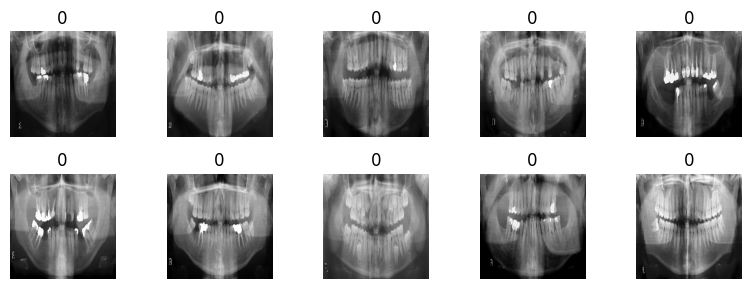

In [11]:
# visualizing 
n_samples = 10

indices = np.random.choice(len(X_test), n_samples, replace=False)
samples = X_test[indices]
labels = [y_test[i] for i in indices]

fig = plot_image_grid(samples, titles=labels)
plt.show()

[11 25 61 62 54  5 39 18 53 66]


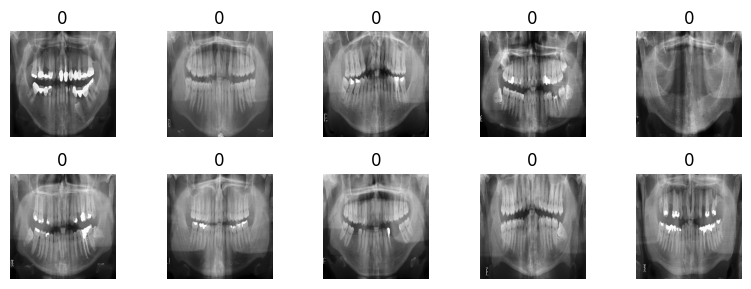

In [39]:
# visualizing 
n_samples = 10

indices = np.random.choice(len(X_train), n_samples, replace=False)
samples = X_train[indices]
labels = [y_train[i] for i in indices]
print(indices)
# print(samples)
fig = plot_image_grid(samples, titles=labels)
plt.show()

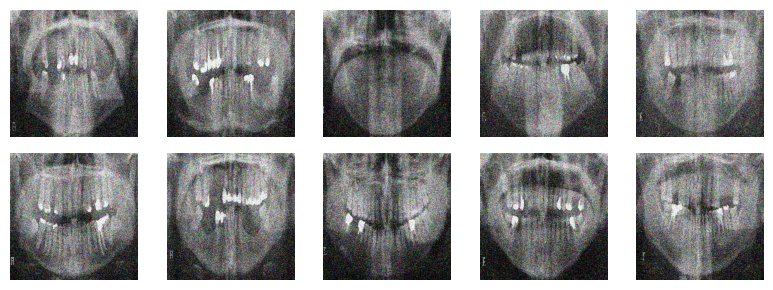

In [ ]:
# adding Gaussian noise 

noise = np.random.normal(loc=0.0, scale=0.2 ,size= X_train.shape)
noisy_images = X_train + noise
X_train_noisy = np.clip(noisy_images, 0.0 , 1.0) # i dod cliping to normilze after adding noise 

plot_image_grid(X_train_noisy)
plt.show()


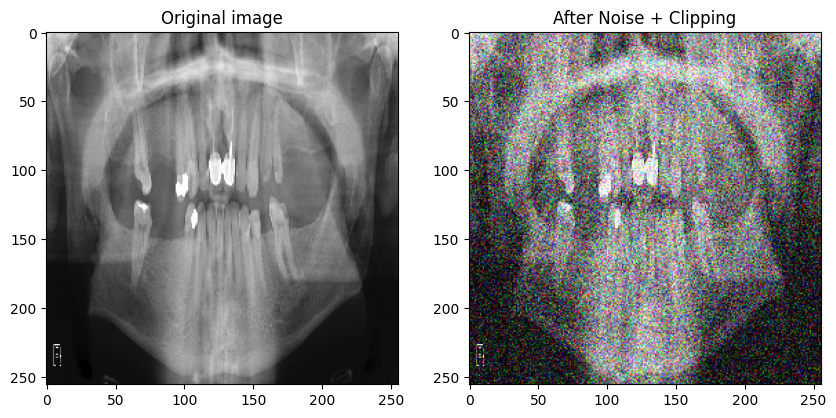

In [50]:
# Compare the first image
fig, axes = plt.subplots(1,2, figsize=(10, 5))


axes[0].set_title("Original image")
axes[0].imshow(X_train[0])


axes[1].set_title("After Noise + Clipping")
axes[1].imshow(X_train_noisy[0])

plt.show()